# **Convolutional Neural Network (CNN) Using TensorFlow Functional API**

### **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, Model, Input, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

### **Download and Prepare the Fashion MNIST Dataset**

Fashion MNIST dataset contains images of 10 fashion categories, similar in structure to MNIST.

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocess the data: normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to include the color channel dimension (1 channel for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

4422102/4422102 [==============================] - 2s 0us/step


### **Verify the Data**

Plot the first 25 images in the training set along with their labels.

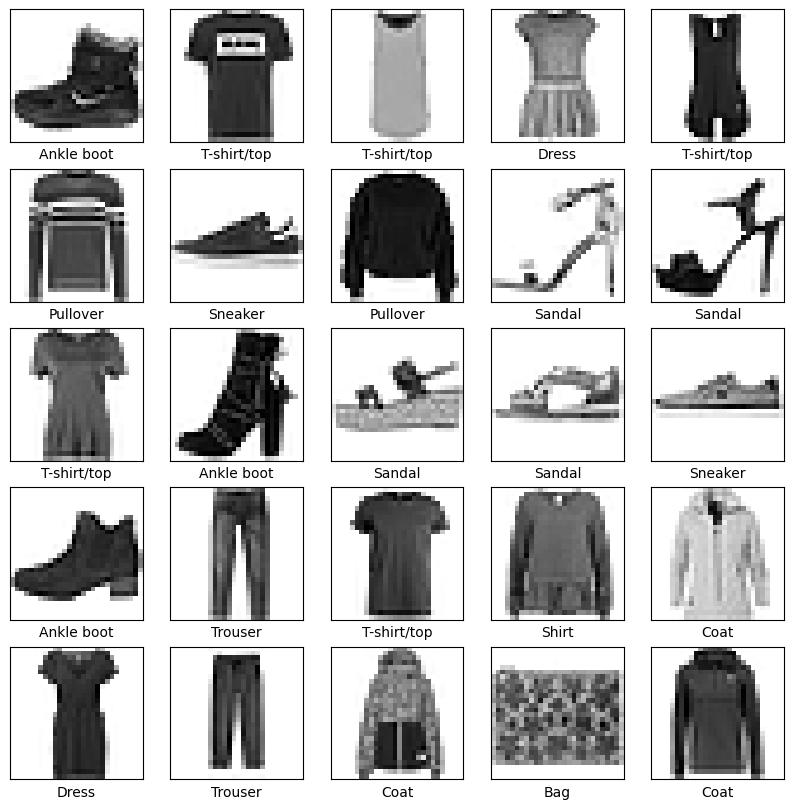

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Build the CNN Model Using Functional API**

Define a more complex CNN with batch normalization and dropout using the Functional API.

In [4]:
def build_model():
    inputs = Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model()

# Display the model
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256 

### **Compile and Train the Model**

Compile the model with the Adam optimizer and the loss function, then train it on the Fashion MNIST dataset.

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


938/938 [==============================] - 32s 25ms/step - loss: 0.6045 - accuracy: 0.7861 - val_loss: 0.3805 - val_accuracy: 0.8711
Epoch 2/10
938/938 [==============================] - 26s 27ms/step - loss: 0.3929 - accuracy: 0.8598 - val_loss: 0.3103 - val_accuracy: 0.8868
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.3223 - accuracy: 0.8854 - val_loss: 0.2782 - val_accuracy: 0.9070
Epoch 4/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2832 - accuracy: 0.8996 - val_loss: 0.2698 - val_accuracy: 0.9058
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2539 - accuracy: 0.9097 - val_loss: 0.2487 - val_accuracy: 0.9116
Epoch 6/10
938/938 [==============================] - 35s 38ms/step - loss: 0.2321 - accuracy: 0.9157 - val_loss: 0.3092 - val_accuracy: 0.8971
Epoch 7/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2109 - accuracy: 0.9226 - val_loss: 0.2392 - val_accura

### **Evaluate and Plot the Results**

Plot the training and validation accuracy over epochs and evaluate the model on the test set.

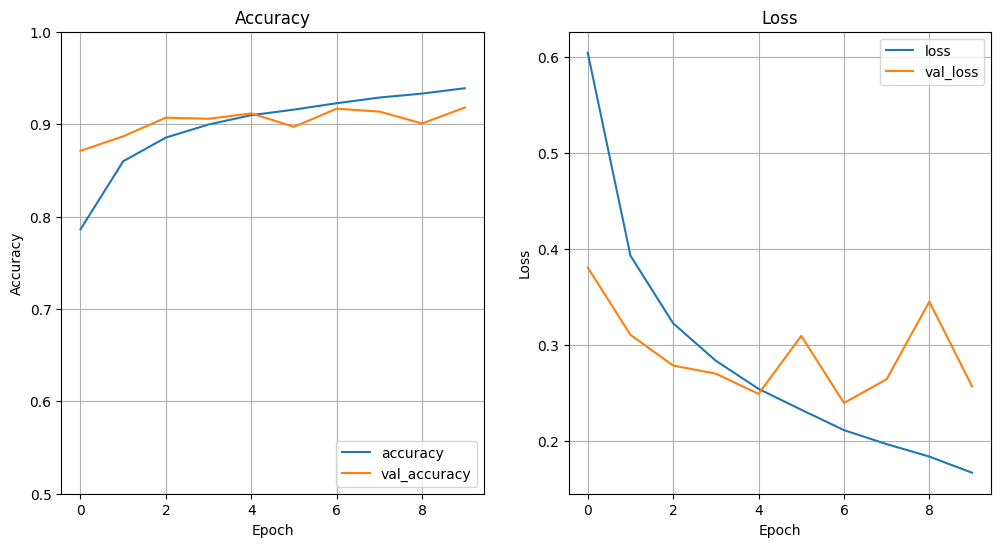

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.grid()

plt.show()

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predict the labels of the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 3s - loss: 0.2565 - accuracy: 0.9179 - 3s/epoch - 8ms/step
Test accuracy: 0.917900025844574
313/313 [==============================] - 2s 6ms/step

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.90      0.85      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.86      0.87      0.86      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.72      0.81      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



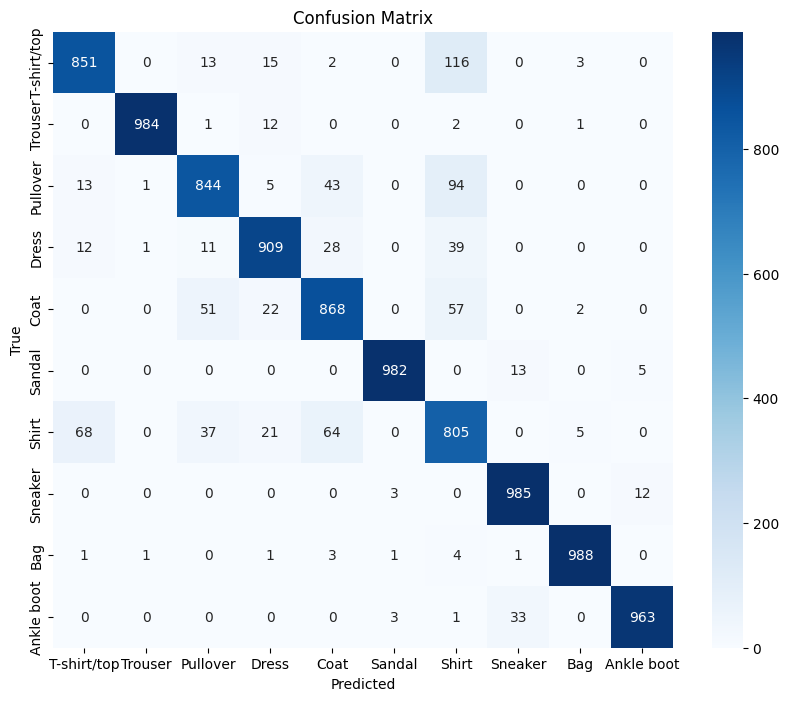

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

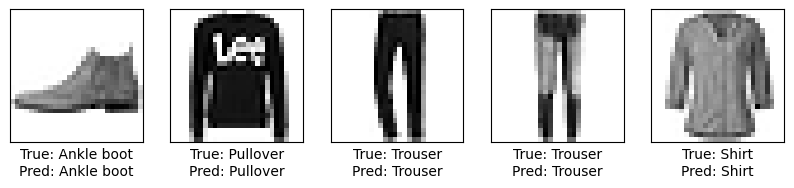

In [10]:
# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
plt.show()